In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 예측 결과

In [2]:
# Kaggle score : 1.64066
result = pd.read_csv('final_result3.csv', index_col=None)
result

,ID,item_cnt_month
0,0,2.204241
1,1,0.000000
2,2,2.122234
3,3,0.000000
4,4,0.000000
...,...,...
214195,214195,0.000000
214196,214196,0.000000
214197,214197,1.609001
214198,214198,0.000000


# EDA 

### 자료 가져오기
- item_categories: 아이템 명칭에 따른 번호 부여
- items: 아이템 품목별 item_category_id
- sales_train: 날짜, 월별 인덱스, shop_id, item_id, item_price, item_cnt_day(-1의미?)
- shops: 가게 이름
- test: ID = shop_id + item_id
---
### 개선 사항 및 추가 설명
- sales_train에 ID, item_category_id 추가할것
- 월별 인덱스: 2013(0 ~ 11), 2014(12 ~ 23), 2015(24 ~ 33 -> predict 34)

In [3]:
item_categories = pd.read_csv('item_categories.csv')

In [4]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
items = pd.read_csv('items.csv')

In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
sales_train = pd.read_csv('sales_train.csv')

In [8]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
shops = pd.read_csv('shops.csv')

In [10]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
test = pd.read_csv('test.csv')

In [12]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [13]:
test.groupby('shop_id')

In [14]:
df = sales_train.copy()

df['date'] = df['date'].apply(lambda x: x[-4:]+x[3:5]+x[:2])
df['date'] = pd.to_datetime(df['date'])
df = pd.merge(df, test, how='left', on=['shop_id', 'item_id'])
df.dropna(axis=0, inplace=True)
df['ID'] = df['ID'].astype('int')

df = pd.merge(df, items[['item_id', 'item_category_id']], how='left', on=['item_id'])
df['item_cnt_day'] = df['item_cnt_day'].astype('int')



In [15]:
df['weeks'] = df['date'].dt.weekday

In [16]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id,weeks
0,2013-01-02,0,59,22154,999.0,1,150983,37,2
1,2013-01-03,0,25,2574,399.0,2,56520,55,3
2,2013-01-05,0,25,2574,399.0,1,56520,55,5
3,2013-01-07,0,25,2574,399.0,1,56520,55,0
4,2013-01-08,0,25,2574,399.0,2,56520,55,1


In [17]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id,weeks
count,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06,1.224439e+06
mean,1.935472e+01,3.215117e+01,9.614866e+03,1.030666e+03,1.321234e+00,9.517727e+04,4.055878e+01,3.316000e+00
std,9.110722e+00,1.646562e+01,6.299870e+03,1.827384e+03,3.312997e+00,5.651974e+04,1.860682e+01,2.002866e+00
min,0.000000e+00,2.000000e+00,3.000000e+01,5.000000e-01,-1.600000e+01,0.000000e+00,2.000000e+00,0.000000e+00
25%,1.200000e+01,1.900000e+01,4.181000e+03,2.990000e+02,1.000000e+00,4.784100e+04,2.500000e+01,2.000000e+00
50%,2.100000e+01,3.100000e+01,7.856000e+03,5.490000e+02,1.000000e+00,8.716000e+04,3.800000e+01,4.000000e+00
75%,2.700000e+01,4.600000e+01,1.522900e+04,1.199000e+03,1.000000e+00,1.400990e+05,5.500000e+01,5.000000e+00
max,3.300000e+01,5.900000e+01,2.216700e+04,5.920000e+04,2.169000e+03,2.141990e+05,8.300000e+01,6.000000e+00


In [18]:
len(df[df['item_cnt_day'] < 0])

2941

# 동일한 물품은 동일한 가격에 판매되는가?
- No

In [19]:
df[df['item_id'] == 2574]['item_price'].value_counts()

399.00    1615
449.00     248
282.00       3
379.00       2
398.50       2
330.00       1
398.70       1
319.00       1
398.95       1
378.45       1
398.90       1
302.45       1
378.90       1
378.70       1
378.75       1
Name: item_price, dtype: int64

# ID별 분포도 조사
- 생각 이상으로 충분한 데이터를 가진 아이템이 많지 않다.
- 100개 이상의 데이터를 갖는 ID가 전체의 1%도 되지 않는다.
- 최댓값이 867임에도 불구하고 평균이 11정도이다.

In [20]:
df['ID'].value_counts().describe()

count    111404.000000
mean         10.990979
std          24.645661
min           1.000000
25%           2.000000
50%           4.000000
75%          11.000000
max         867.000000
Name: ID, dtype: float64

In [21]:
ID_count = df['ID'].value_counts()
ID_count

41260     867
46360     863
117760    863
61660     848
102460    834
         ... 
123431      1
18223       1
22317       1
26411       1
3464        1
Name: ID, Length: 111404, dtype: int64

In [22]:
len(ID_count[ID_count< 50])

107249

# 품목별 분포도 조사
- 절반에 가까운 데이터가 100개도 존재하지 않음

In [23]:
df['item_id'].value_counts().describe()

count     4716.000000
mean       259.635072
std        636.234263
min          1.000000
25%         28.000000
50%        100.000000
75%        271.000000
max      26488.000000
Name: item_id, dtype: float64

In [24]:
item_id_counts = df['item_id'].value_counts()
item_id_counts

20949    26488
5822      7919
17717     7896
2808      6337
4181      5985
         ...  
938          1
8214         1
19075        1
16064        1
21010        1
Name: item_id, Length: 4716, dtype: int64

In [25]:
len(item_id_counts[item_id_counts < 50])

1627

# 데이터량이 가장 많은 상위 2개 ID에 따른 월별, 연도별 누적 데이터 분석 

In [26]:
ID_index_top5 = ID_count[0:5].index

In [27]:
month_data = {}

for i in ID_index_top5:
    month_data[str(i)] = df[df['ID'] == i]

month_data.keys()

dict_keys(['41260', '46360', '117760', '61660', '102460'])

## ID: 41260

In [28]:
month_data['41260']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id,weeks
61323,2013-04-29,3,28,20949,5.0,2,41260,71,0
61324,2013-04-30,3,28,20949,5.0,5,41260,71,1
77499,2013-05-31,4,28,20949,5.0,18,41260,71,4
77529,2013-05-30,4,28,20949,5.0,9,41260,71,3
77530,2013-05-28,4,28,20949,5.0,15,41260,71,1
...,...,...,...,...,...,...,...,...,...
1217409,2015-10-27,33,28,20949,5.0,2,41260,71,1
1217410,2015-10-29,33,28,20949,5.0,12,41260,71,3
1217411,2015-10-30,33,28,20949,5.0,4,41260,71,4
1217412,2015-10-31,33,28,20949,5.0,15,41260,71,5


In [29]:
month_data['41260']['date_block_num'].value_counts(sort = False)

3      2
4     31
5     30
6     31
7     31
8     29
9     31
10    30
11    31
12    31
13    28
14    31
15    30
16    31
17    30
18    31
19    31
20    30
21    31
22    30
23    30
24    31
25     7
26     7
27    30
28    31
29    30
30    31
31    31
32    29
33    30
Name: date_block_num, dtype: int64

- 제품이 2013.4월 말에 출시가 되었을 거라고 추측이 가능

In [30]:
months = month_data['41260']['date_block_num'].unique()

In [31]:
sold_data = month_data['41260'][['date_block_num', 'item_cnt_day']]

In [32]:
accumulate_month_data_41260 = {}

for month in months:
    temp = sold_data[sold_data['date_block_num'] == month]['item_cnt_day'].tolist()
    temp_list = []
    temp_list.append(temp[0])
    for i in range(1,len(temp)):
        temp_list.append(temp[i] + temp_list[i-1])
        
    accumulate_month_data_41260[f'{2013 + (month // 12)}-{(month % 12) + 1}'] = temp_list

for month in accumulate_month_data_41260:
    print(month)

2013-4
2013-5
2013-6
2013-7
2013-8
2013-9
2013-10
2013-11
2013-12
2014-1
2014-2
2014-3
2014-4
2014-5
2014-6
2014-7
2014-8
2014-9
2014-10
2014-11
2014-12
2015-1
2015-2
2015-3
2015-4
2015-5
2015-6
2015-7
2015-8
2015-9
2015-10


In [33]:
may = {'2013-5':accumulate_month_data_41260['2013-5'],
      '2014-5':accumulate_month_data_41260['2014-5'],
      '2015-5':accumulate_month_data_41260['2015-5']}

In [34]:
may = pd.DataFrame(may)

<AxesSubplot:>

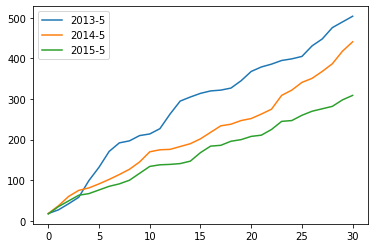

In [35]:
may.plot()

## ID: 117760

In [36]:
month_data['117760']

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,item_category_id,weeks
67861,2013-04-30,3,53,20949,5.0,6,117760,71,1
67863,2013-04-29,3,53,20949,5.0,2,117760,71,0
85990,2013-05-01,4,53,20949,5.0,8,117760,71,2
85991,2013-05-02,4,53,20949,5.0,2,117760,71,3
85992,2013-05-03,4,53,20949,5.0,5,117760,71,4
...,...,...,...,...,...,...,...,...,...
1197315,2015-10-27,33,53,20949,5.0,1,117760,71,1
1197316,2015-10-28,33,53,20949,5.0,3,117760,71,2
1197317,2015-10-30,33,53,20949,5.0,4,117760,71,4
1197318,2015-10-31,33,53,20949,5.0,4,117760,71,5


In [37]:
month_data['117760']['date_block_num'].value_counts(sort = False)

3      2
4     31
5     30
6     27
7     31
8     29
9     31
10    30
11    30
12    30
13    27
14    31
15    28
16    30
17    29
18    30
19    31
20    29
21    29
22    28
23    30
24    29
25    27
26    26
27    28
28    28
29    27
30    29
31    27
32    26
33    23
Name: date_block_num, dtype: int64

In [38]:
months = month_data['117760']['date_block_num'].unique()
sold_data = month_data['117760'][['date_block_num', 'item_cnt_day']]

In [39]:
accumulate_month_data_117760 = {}

for month in months:
    temp = sold_data[sold_data['date_block_num'] == month]['item_cnt_day'].tolist()
    temp_list = []
    temp_list.append(temp[0])
    for i in range(1,len(temp)):
        temp_list.append(temp[i] + temp_list[i-1])
        
    accumulate_month_data_117760[f'{2013 + (month // 12)}-{(month % 12) + 1}'] = temp_list

for month in accumulate_month_data_117760:
    print(month)

2013-4
2013-5
2013-6
2013-7
2013-8
2013-9
2013-10
2013-11
2013-12
2014-1
2014-2
2014-3
2014-4
2014-5
2014-6
2014-7
2014-8
2014-9
2014-10
2014-11
2014-12
2015-1
2015-2
2015-3
2015-4
2015-5
2015-6
2015-7
2015-8
2015-9
2015-10


In [40]:
may_117760 = {'2013-5':accumulate_month_data_117760['2013-5'],
      '2014-5':accumulate_month_data_117760['2014-5'],
      '2015-5':accumulate_month_data_117760['2015-5']}

In [41]:
for may in may_117760:
    print(len(may_117760[may]))

31
30
28


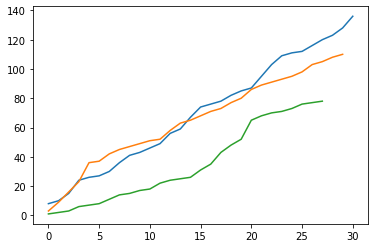

In [42]:
for may in may_117760:
    pd.Series(may_117760[may]).plot()

<AxesSubplot:xlabel='date_block_num'>

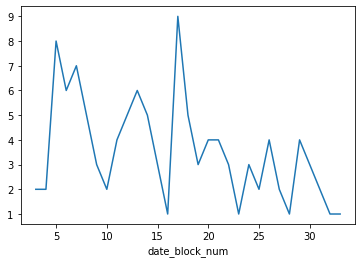

In [43]:
month_data['41260'].groupby('date_block_num').min()['item_cnt_day'].plot()

# 전처리

* features
    * 기존 feature
        * ID
        * shop_id
        * item_id
        * item_category_id
    * 추가한 feature
        * year : 연도
        * month : 월
        * item_price : 월 평균 거래단가
        * category_occ : item_category별 판매 개수 점유율
        * total_mean_item_price : 전체 월 평균 거래단가
* target
    * item_cnt_month : 월 판매개수

* 2015년 11월 예측할 때
    * item_price
        * 최근 3개월 + 전년도 같은 달의 item_price 총 5개월치 값을 넣음
        * 월 평균 1개 미만의 값은 0으로 처리
    * category_occ
        * 주어진 데이터에서 얻은 item_category별 판매 개수 점유율을 반영
        * groupby 활용
    * total_mean_item_price
        * 주어진 데이터에서 얻은 전체 월 평균 거래단가 반영
        * groupby 활용

In [47]:
df_preprocess = pd.read_csv('data_frame_v2.csv', index_col=None)
df_preprocess

,year,month,ID,data_block_num,shop_id,item_id,item_category_id,item_price,category_occ,total_mean_item_price,item_cnt_month
0,2013,1,5122,0,4,5823,35,2500.00,162,2635.116266,1
1,2013,1,5127,0,4,5643,2,2330.25,43,2539.082418,3
2,2013,1,5142,0,4,5821,35,599.00,162,822.133789,2
3,2013,1,5143,0,4,5822,35,999.00,162,1064.279381,9
4,2013,1,5152,0,4,5459,55,299.00,1105,330.464615,1
...,...,...,...,...,...,...,...,...,...,...,...
600154,2015,10,213962,33,45,16106,64,799.00,158,573.999197,1
600155,2015,10,214068,33,45,6184,30,498.00,1362,670.072416,1
600156,2015,10,214069,33,45,3985,55,98.00,1105,249.491071,1
600157,2015,10,214187,33,45,5401,19,799.00,677,1626.173585,1


# Model 설명

* MLP 구현

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


# train log 확인

In [46]:
with open('training_log3.txt', 'r') as f:
    for line in f:
        print(line)


Epoch 1/50

4689/4689 - 8s - loss: 126.9620



Epoch 00001: saving model to ./Model_check_point\final_checkpoint_20210712_2255.ckpt

Epoch 2/50

4689/4689 - 7s - loss: 123.5891



Epoch 00002: saving model to ./Model_check_point\final_checkpoint_20210712_2255.ckpt

Epoch 3/50

4689/4689 - 7s - loss: 119.9796



Epoch 00003: saving model to ./Model_check_point\final_checkpoint_20210712_2255.ckpt

Epoch 4/50

4689/4689 - 7s - loss: 116.6684



Epoch 00004: saving model to ./Model_check_point\final_checkpoint_20210712_2255.ckpt

Epoch 5/50

4689/4689 - 7s - loss: 113.2482



Epoch 00005: saving model to ./Model_check_point\final_checkpoint_20210712_2255.ckpt

Epoch 6/50

4689/4689 - 7s - loss: 110.2292



Epoch 00006: saving model to ./Model_check_point\final_checkpoint_20210712_2255.ckpt

Epoch 7/50

4689/4689 - 7s - loss: 107.5692



Epoch 00007: saving model to ./Model_check_point\final_checkpoint_20210712_2255.ckpt

Epoch 8/50

4689/4689 - 6s - loss: 105.1653



Epoch 00008: saving mo

# 차후 개선 가능한 방향

1. 데이터 전처리 개선
    * feature 추가
        * item_cnt의 월별 추이 정보를 담은 feature를 추가할 수 있음
    * item_cnt가 0인 row 추가
2. Model 구조 개선
    * layer의 차원 수
    * dropout -> 데이터 수가 적어서 개선이 안됨.
    * MLP 외에 다른 Machine Learning 모델 활용가능 (ex : ARIMA, LR, RandomForest, etc...)

# Finish

In [49]:
print('끝')

끝
